# 🌙 Taller 4: Preparación de los datos💤  


## Integrantes:  
- Katherin Escobar
- Heberth Martinez
- Diana Mazuera
- Natalia Santamaria

## 📌 Descripción  
Este notebook presenta un **Análisis Exploratorio Univariable** del dataset disponible en [Kaggle](https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity/data) 🛌📊.  

Se explorarán las variables de manera individual para comprender su distribución, tendencias y posibles anomalías. Además, se identificarán las variables que más influyen en la variable objetivo: **Productivity Score** 🎯📈.  

El análisis se realizará utilizando librerías de Python como:  
✅ **pandas** para manipulación de datos  
✅ **matplotlib** y **seaborn** para visualización  
✅ **numpy** para cálculos estadísticos  
✅ **scipy** para análisis estadístico avanzado  
✅ **sklearn** para selección de variables y correlación  
✅ **plotly** para visualizaciones interactivas  

¡Vamos a descubrir cómo el sueño afecta la productividad! 🚀😴  


In [ ]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

## 🔍 Carga y Exploración del Dataset

En esta sección, realizamos los primeros pasos esenciales en el análisis de datos:

1. **Carga del dataset** 📂  
   - Importamos los datos y verificamos su correcta lectura.

2. **Descripción y resumen del dataset** 📝  
   - Mostramos estadísticas generales sobre las variables.

3. **Información del dataset** ℹ️  
   - Revisamos el tipo de datos en cada columna.

4. **Validación de tipos de variables** ✅  
   - Aseguramos que cada columna tiene el tipo de dato correcto.

5. **Detección de valores nulos** 🚨  
   - Identificamos si existen valores faltantes en las variables y evaluamos cómo manejarlos.

In [19]:
# Load dataset with selected columns
columns = ['Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 
           'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 
           'Productivity Score', 'Mood Score', 'Stress Level']
df = pd.read_csv('https://raw.githubusercontent.com/M-Ciencia-de-datos/analisis-exploratorio/refs/heads/main/Taller%202/data/sleep_cycle_productivity.csv', usecols=columns)

In [20]:
# Display basic info
display(df.head())
display(df.info())
display(df.dtypes)

Total Sleep Hours  Exercise (mins/day)  Caffeine Intake (mg)  \
0               5.28                   86                    87   
1               5.41                   32                    21   
2               5.35                   17                    88   
3               7.55                   46                    34   
4               6.75                   61                   269   

   Screen Time Before Bed (mins)  Work Hours (hrs/day)  Productivity Score  \
0                            116              8.808920                   8   
1                             88              6.329833                  10   
2                             59              8.506306                  10   
3                             80              6.070240                   8   
4                             94             11.374994                   8   

   Mood Score  Stress Level  
0           3             6  
1           3             7  
2           9            10  
3           4             2  
4           7             9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total Sleep Hours              5000 non-null   float64
 1   Exercise (mins/day)            5000 non-null   int64  
 2   Caffeine Intake (mg)           5000 non-null   int64  
 3   Screen Time Before Bed (mins)  5000 non-null   int64  
 4   Work Hours (hrs/day)           5000 non-null   float64
 5   Productivity Score             5000 non-null   int64  
 6   Mood Score                     5000 non-null   int64  
 7   Stress Level                   5000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.6 KB


None

Total Sleep Hours                float64
Exercise (mins/day)                int64
Caffeine Intake (mg)               int64
Screen Time Before Bed (mins)      int64
Work Hours (hrs/day)             float64
Productivity Score                 int64
Mood Score                         int64
Stress Level                       int64
dtype: object

In [21]:
df.isnull().sum()

Total Sleep Hours                0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64

## 🔍 Exploración de Relaciones entre Variables con Pairplot  

En esta sección, utilizamos **Seaborn** para generar un **pairplot**, una herramienta visual que nos permite:  

- 📊 **Analizar la relación entre todas las variables numéricas** del dataset.  
- 🎯 **Detectar correlaciones y patrones** en los datos.  
- 🔎 **Observar la distribución univariada** de cada variable en los histogramas de la diagonal.  

Este análisis es clave para entender cómo se comportan las variables entre sí y tomar decisiones informadas en la selección de características para el modelo.  


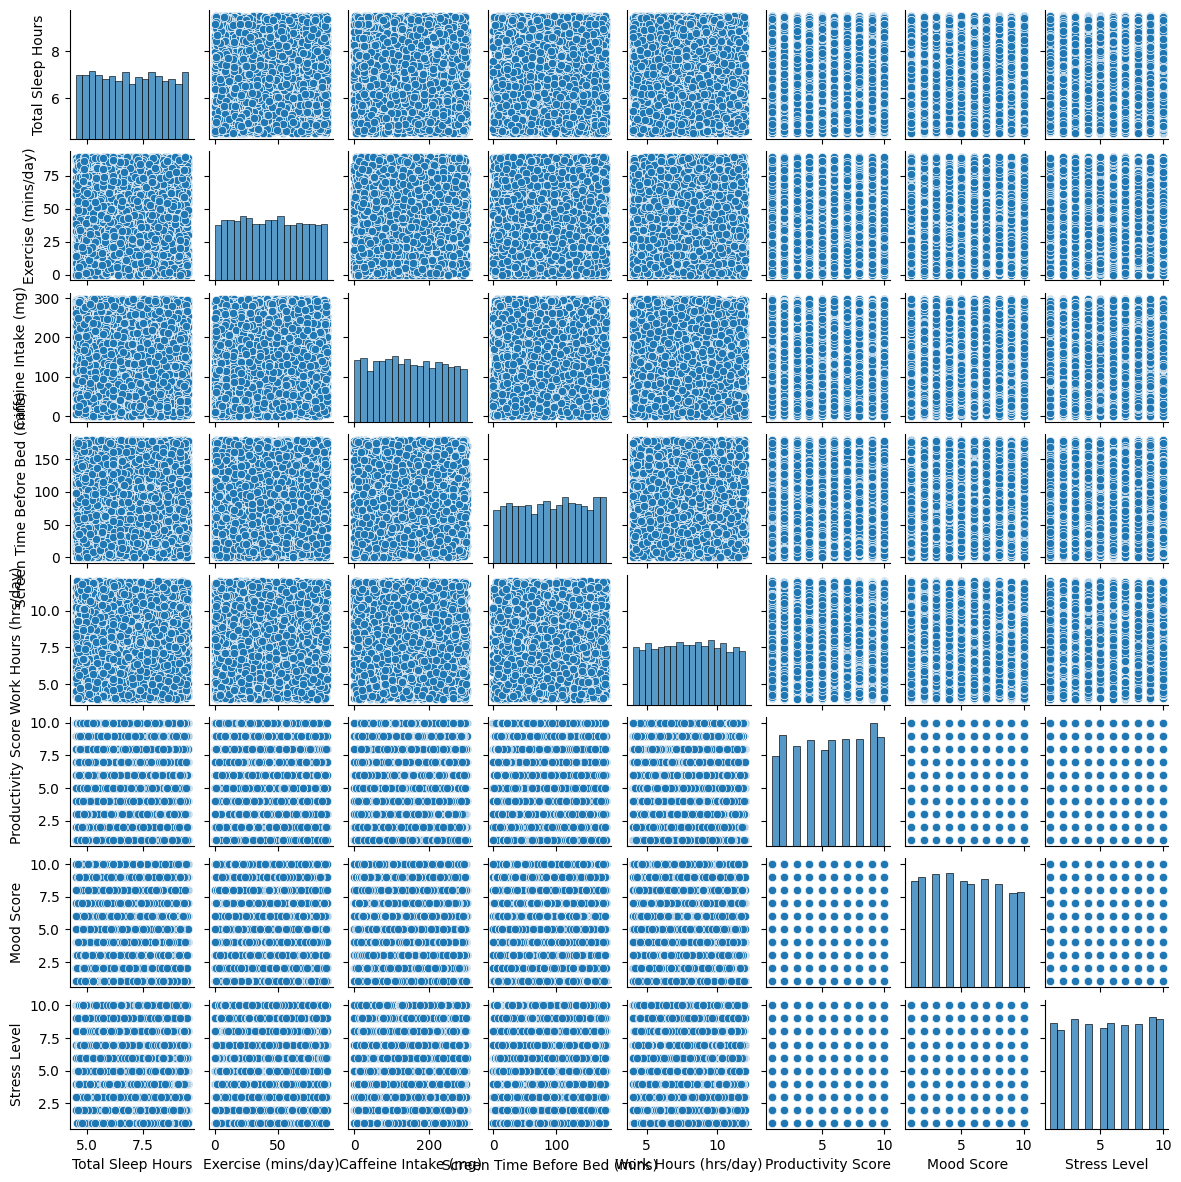

In [22]:
sns.pairplot(df, height=1.5)

## 📦 Visualización de la Distribución con Box Plot Interactivo  

En esta sección, utilizamos **Plotly** para generar un **box plot interactivo**, el cual nos permite:  

- 📊 **Observar la distribución de los datos** y detectar valores atípicos.  
- 🔍 **Comparar múltiples variables** de manera visual.  
- 🖱️ **Interactuar con la gráfica**, permitiendo zoom, selección y visualización dinámica de los datos.  



In [23]:


fig = px.box(
    df, 
    y=columns, 
    title="Boxplot: Sleep Cycle & Productivity", 
    points="all", 
    template="plotly_white"
)

fig.update_layout(
    yaxis=dict(title="Valores", autorange=True), 
    xaxis=dict(title="Categoría"), 
    title_x=0.5,  
    boxmode="group"
)

fig.show()

## 🔗 Análisis de Correlación  

En esta sección, realizamos el análisis de correlación para comprender la relación entre las variables del dataset.  

- 📊 **Calculamos la matriz de correlación** para evaluar cómo se relacionan las variables entre sí.  
- 🔥 **Identificamos las dos variables con mayor correlación** respecto a la variable objetivo.  
- 🎨 **Visualizamos la matriz de correlación** con un heatmap para interpretar mejor los patrones y dependencias entre variables.  

Este análisis nos ayuda a seleccionar las características más relevantes para modelos predictivos y reducir la dimensionalidad del problema.  


In [24]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Select the top 2 correlated variables with Productivity Score
target = 'Productivity Score'
correlations = correlation_matrix[target].drop(target).abs()
top2_features = correlations.nlargest(2).index.tolist()
print(f"Top 2 correlated features with {target}: {top2_features}")

Top 2 correlated features with Productivity Score: ['Exercise (mins/day)', 'Total Sleep Hours']


In [25]:
# Compute Pearson and Spearman correlations
pearson_corr = df[top2_features + [target]].corr(method='pearson')
spearman_corr1, _ = spearmanr(df[top2_features[0]], df[target])
spearman_corr2, _ = spearmanr(df[top2_features[1]], df[target])
print(f"Spearman correlation for {top2_features[0]}: {spearman_corr1}")
print(f"Spearman correlation for {top2_features[1]}: {spearman_corr2}")

Spearman correlation for Exercise (mins/day): -0.02450090350018176
Spearman correlation for Total Sleep Hours: 0.018929915202847175


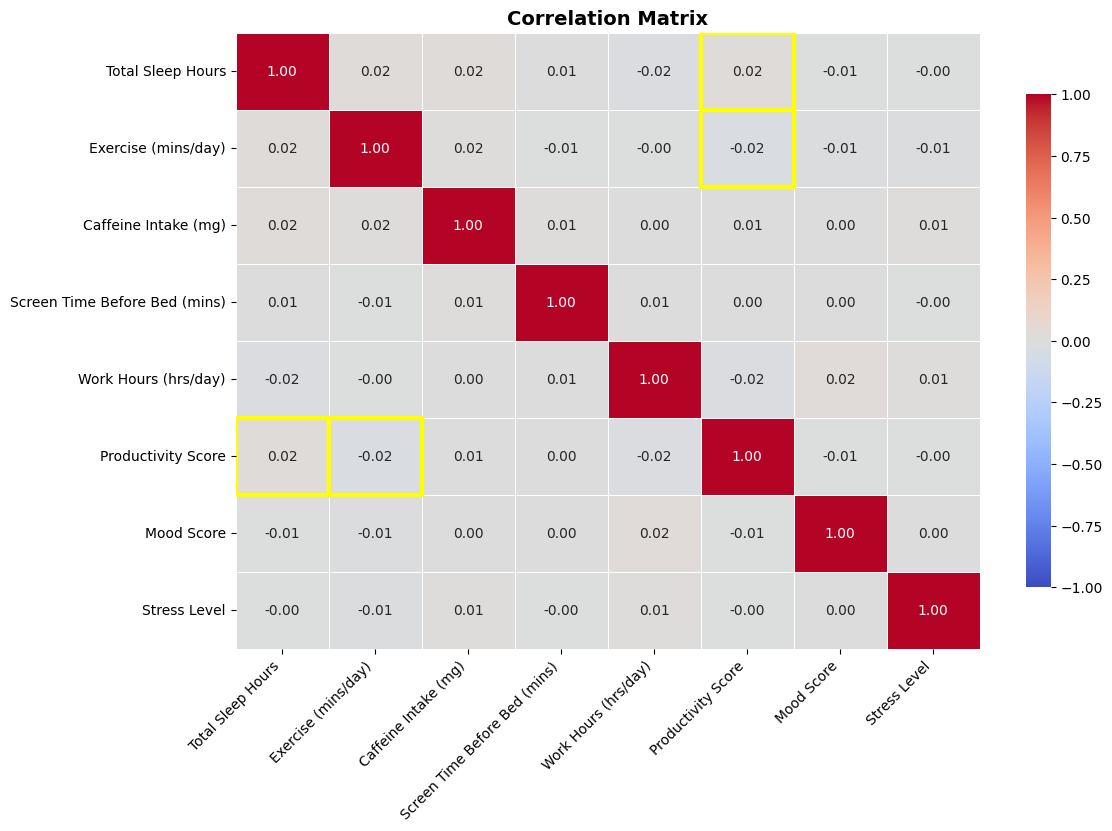

In [26]:
target_correlations = correlation_matrix[target].drop(target)  
top_features = target_correlations.abs().nlargest(2).index  


plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.7, 
    vmin=-1, vmax=1,
    cbar_kws={'shrink': 0.8}
)


for feature in top_features:
    i, j = correlation_matrix.index.get_loc(feature), correlation_matrix.columns.get_loc(target)

    ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=3)) 
    ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=False, edgecolor='yellow', lw=3)) 

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix", fontsize=14, fontweight="bold")
plt.show()

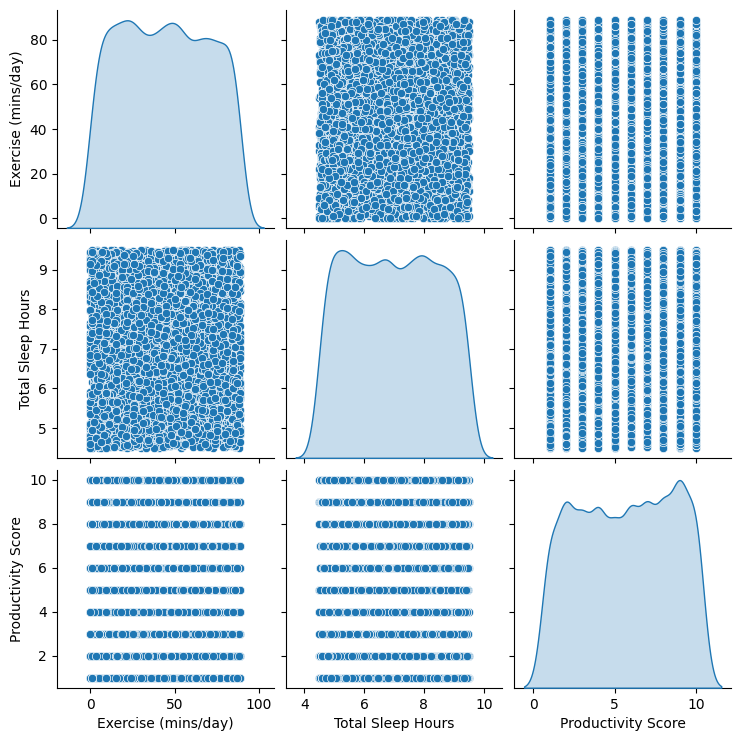

In [27]:
# Pairplot for top correlated features
sns.pairplot(df[top2_features + [target]], diag_kind='kde')
plt.show()

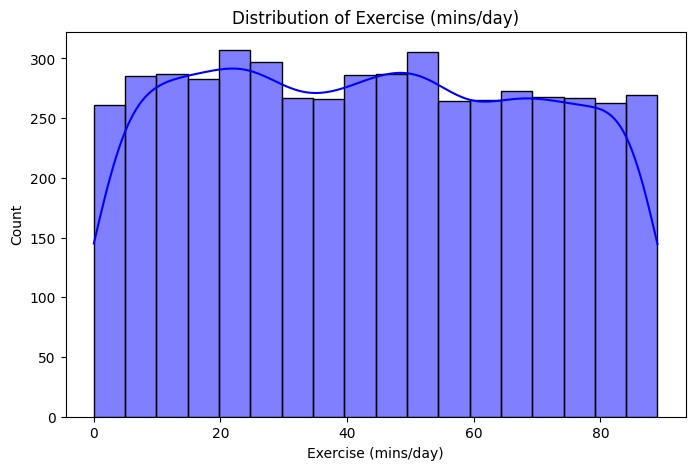

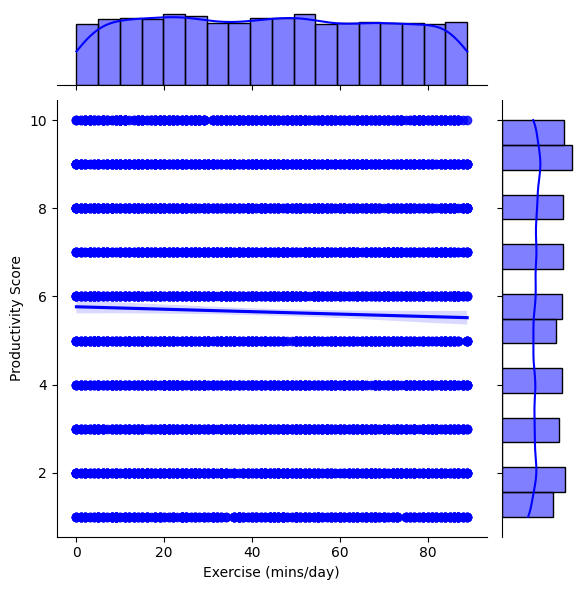

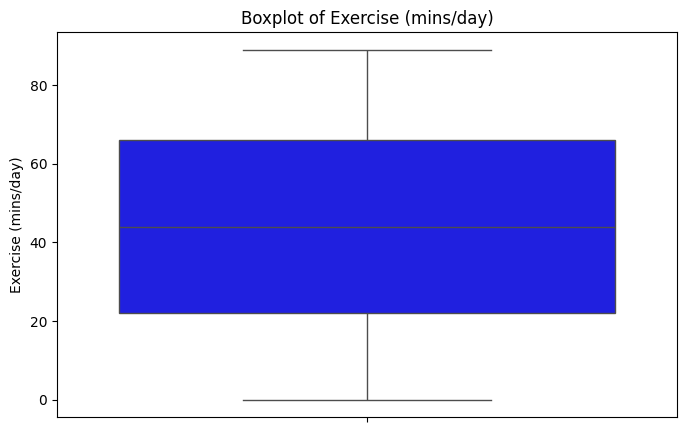

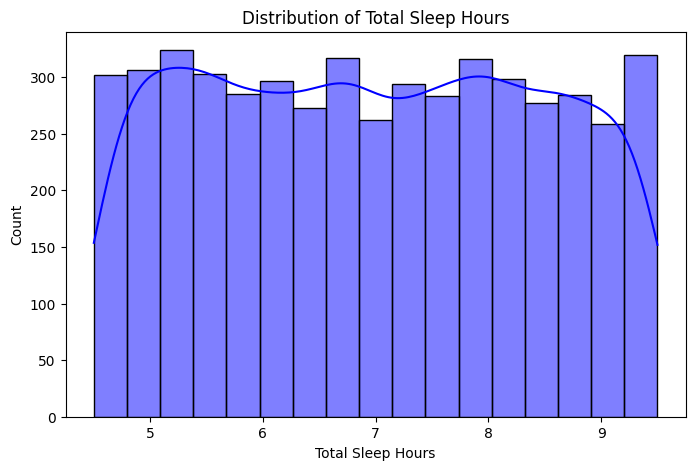

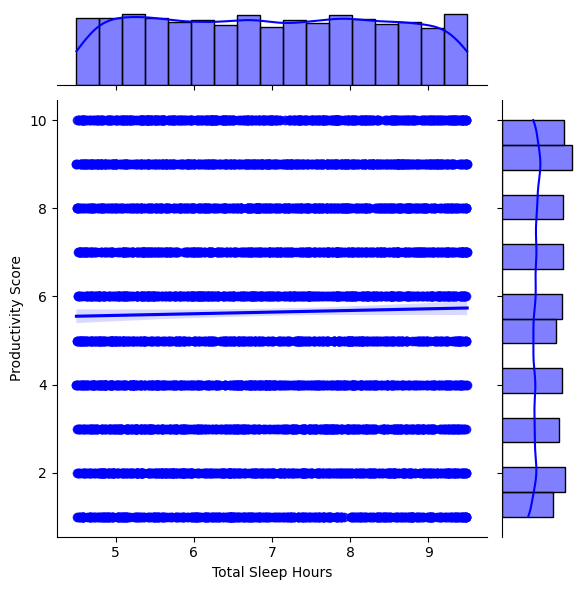

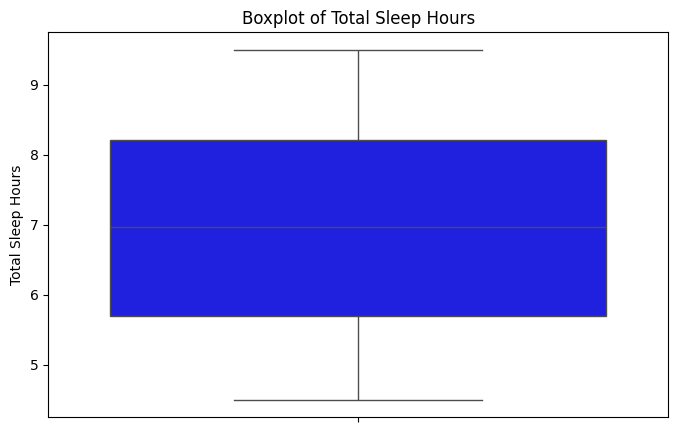

In [28]:
# Visualize distributions and scatter plots
for feature in top2_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.show()

    sns.jointplot(data=df, x=feature, y=target, kind='reg', height=6, color='blue')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[feature], color="blue")
    plt.title(f"Boxplot of {feature}")
    plt.show()

## 🔄 Normalización de Datos y Reevaluación de Correlación  

En esta sección, aplicamos diferentes técnicas de normalización para evaluar cómo cambian los valores de las variables y su impacto en la correlación:  

- 📏 **StandardScaler:** Transforma los datos para que tengan media 0 y desviación estándar 1.  
- 📊 **MinMaxScaler:** Escala los valores dentro de un rango de 0 a 1.  

Después de normalizar los datos, repetimos el cálculo de la matriz de correlación para observar cómo la transformación afecta las relaciones entre variables, en particular las dos que inicialmente mostraron la mayor correlación con la variable objetivo.  


In [29]:
# Normalization and Scaling
scaler = StandardScaler()
df_scaled =  pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

minmax_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)

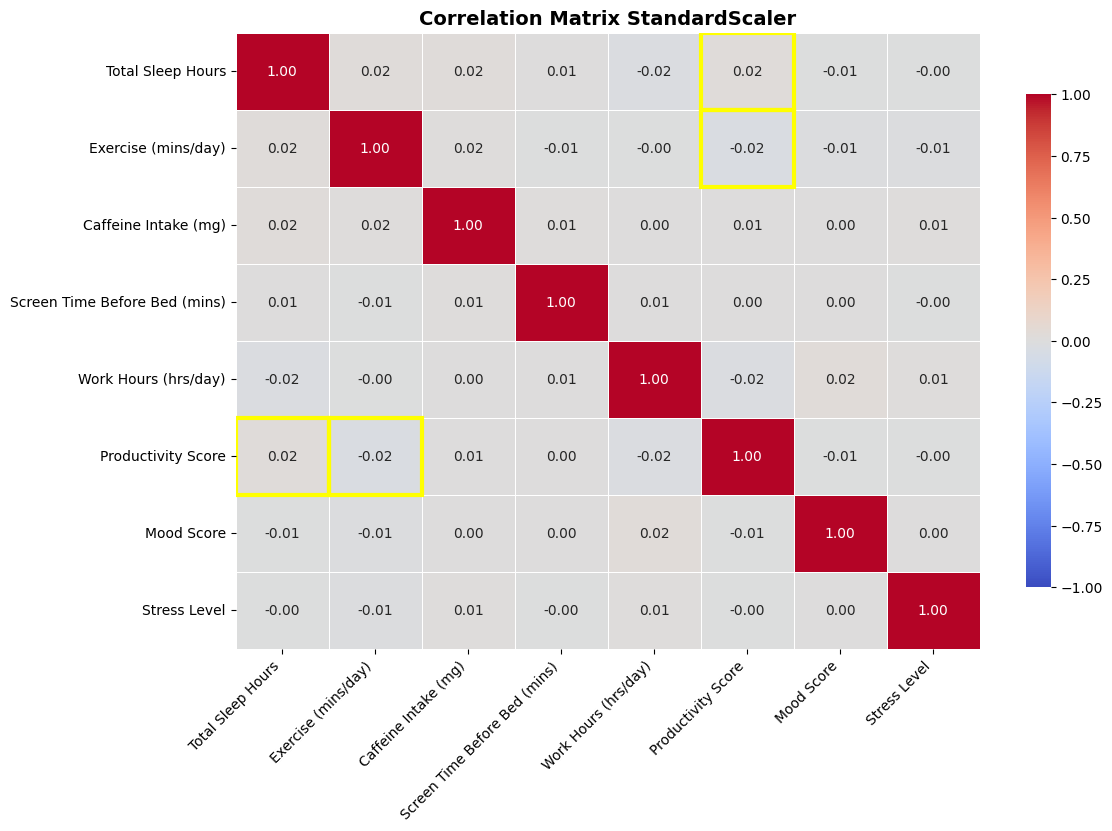

In [30]:
# Compute correlation matrix scaled data
correlation_matrix = df_scaled.corr()

target_correlations = correlation_matrix[target].drop(target)  
top_features = target_correlations.abs().nlargest(2).index  


plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.7, 
    vmin=-1, vmax=1,
    cbar_kws={'shrink': 0.8}
)


for feature in top_features:
    i, j = correlation_matrix.index.get_loc(feature), correlation_matrix.columns.get_loc(target)

    ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=3)) 
    ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=False, edgecolor='yellow', lw=3)) 

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix StandardScaler", fontsize=14, fontweight="bold")
plt.show()

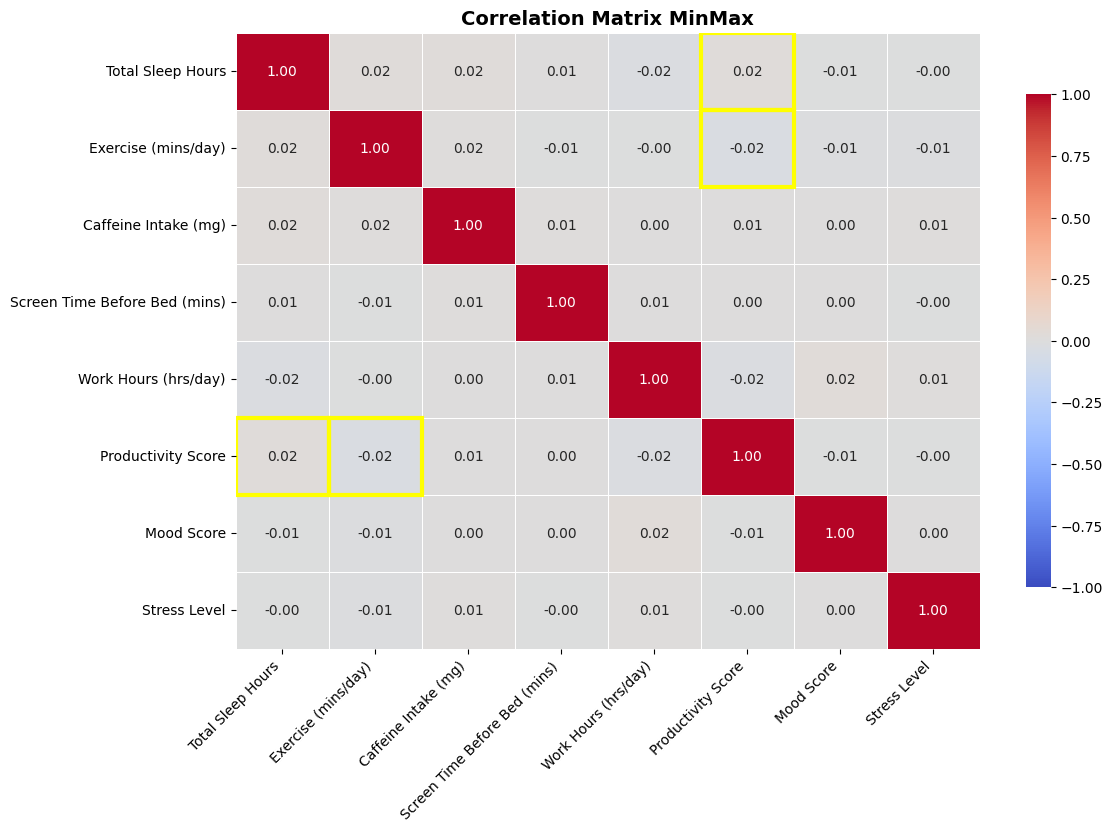

In [31]:
# Compute correlation matrix normalized data
correlation_matrix = df_normalized.corr()

target_correlations = correlation_matrix[target].drop(target)  
top_features = target_correlations.abs().nlargest(2).index  


plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.7, 
    vmin=-1, vmax=1,
    cbar_kws={'shrink': 0.8}
)


for feature in top_features:
    i, j = correlation_matrix.index.get_loc(feature), correlation_matrix.columns.get_loc(target)

    ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=3)) 
    ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=False, edgecolor='yellow', lw=3)) 

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix MinMax", fontsize=14, fontweight="bold")
plt.show()

## 📊 Análisis de Estadística Descriptiva  

En esta sección, exploramos las características principales de los datos mediante estadística descriptiva. Aplicamos varias métricas clave para comprender la distribución y variabilidad de las variables:  

- 📈 **Media (Promedio):** Representa el valor central de los datos.  
- 📏 **Mediana:** Divide los datos en dos partes iguales, útil cuando hay valores atípicos.  
- 🎯 **Moda:** Valor más frecuente en la distribución.  
- 📊 **Percentiles (25%, 50%, 75%):** Indican la dispersión y distribución de los datos.  
- 📉 **Desviación estándar y varianza:** Miden la dispersión de los datos respecto a la media.  

También generamos visualizaciones para una mejor interpretación, incluyendo:  
- 🔵 **Histogramas:** Para observar la distribución de los datos.  
- 📊 **Boxplots (Diagramas de caja):** Para identificar valores atípicos y la variabilidad de las variables.  

Este análisis nos ayuda a comprender mejor la naturaleza de los datos antes de aplicar modelos predictivos.  


                      count       mean        std  min    25%    50%    75%  \
Exercise (mins/day)  5000.0  43.962600  25.798541  0.0  22.00  44.00  66.00   
Total Sleep Hours    5000.0   6.974902   1.454033  4.5   5.69   6.96   8.21   

                      max   mode    variance  skewness  kurtosis  
Exercise (mins/day)  89.0  86.00  665.564714  0.036178 -1.187155  
Total Sleep Hours     9.5   8.02    2.114211  0.021970 -1.210223  


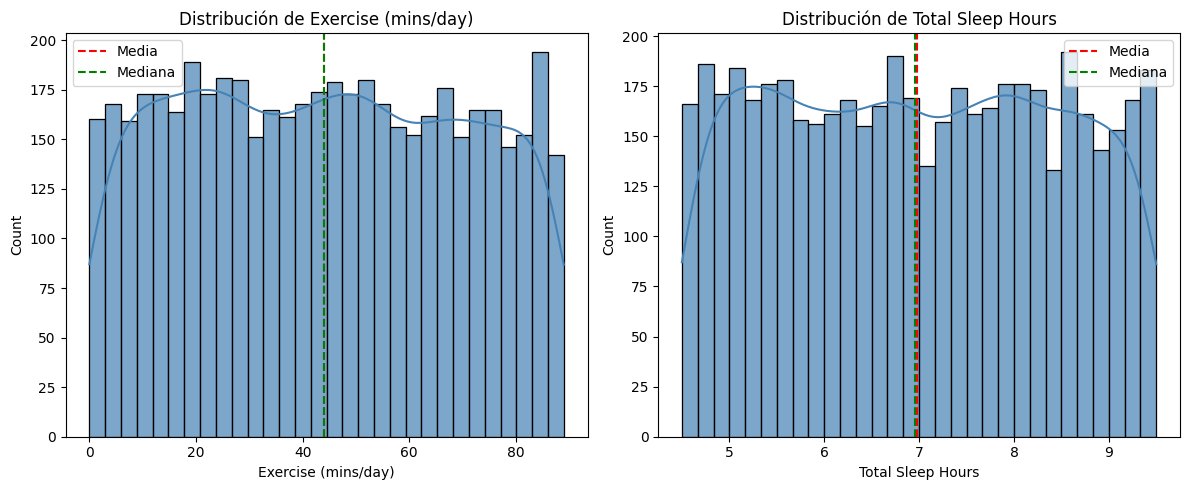

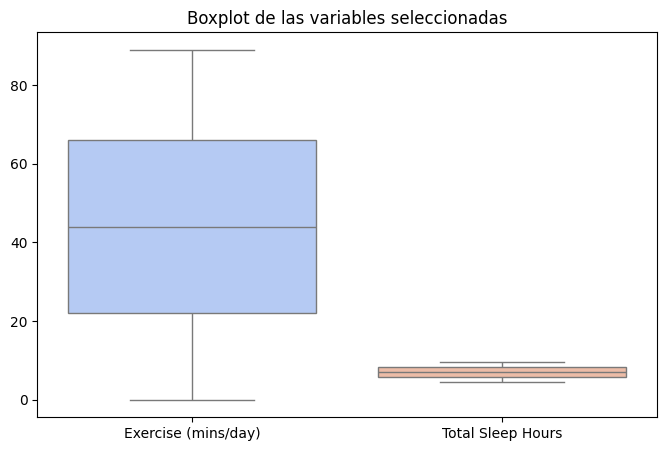

In [32]:
var1, var2 = top2_features  


df_selected = df[[var1, var2]]


stats = df_selected.describe().T  # Transpuesta para mejor visualización
stats["mode"] = df_selected.mode().iloc[0]  # Moda
stats["variance"] = df_selected.var()  # Varianza
stats["skewness"] = df_selected.skew()  # Asimetría
stats["kurtosis"] = df_selected.kurt()  # Curtosis
stats["25%"] = df_selected.quantile(0.25)  # Percentil 25
stats["50%"] = df_selected.median()  # Mediana (percentil 50)
stats["75%"] = df_selected.quantile(0.75)  # Percentil 75

# Mostrar estadísticas
print(stats)


plt.figure(figsize=(12, 5))

for i, var in enumerate([var1, var2], 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[var], kde=True, bins=30, color="steelblue", alpha=0.7)
    plt.axvline(df[var].mean(), color='red', linestyle='dashed', label="Media")
    plt.axvline(df[var].median(), color='green', linestyle='dashed', label="Mediana")
    plt.title(f"Distribución de {var}")
    plt.legend()

plt.tight_layout()
plt.show()

# Graficar Boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_selected, palette="coolwarm")
plt.title("Boxplot de las variables seleccionadas")
plt.show()

## 🔍 Selección de Variables con Regresión Logística y ElasticNet  

En esta sección, utilizamos un modelo de **Regresión Logística con ElasticNet** junto con **validación cruzada (Cross-Validation, CV)** para identificar las variables más relevantes en la predicción de nuestra variable objetivo.  

### 🔹 Pasos realizados:  
1. **Normalización de datos:** Aplicamos `StandardScaler` para garantizar que todas las variables tengan la misma escala.  
2. **División de datos:** Separamos el conjunto en entrenamiento y prueba con `train_test_split`.  
3. **Entrenamiento del modelo:**  
   - Utilizamos `LogisticRegressionCV` con el **penalty** `elasticnet`.  
   - Ajustamos el hiperparámetro `l1_ratio`, que controla el balance entre Lasso (L1) y Ridge (L2).  
   - Probamos múltiples valores de `C` para encontrar la mejor regularización.  
4. **Interpretación de coeficientes:** Identificamos las variables con mayor peso en la predicción según el modelo.  

### 📌 ¿Por qué ElasticNet?  
- **Combina Lasso y Ridge**, permitiendo eliminar variables irrelevantes (`L1`) y reducir la multicolinealidad (`L2`).  
- **Mejora la interpretabilidad**, al seleccionar solo las variables más importantes para el modelo.  

Finalmente, comparamos los resultados obtenidos con el análisis de correlación previo para validar si las variables más correlacionadas también fueron seleccionadas por el modelo. 🚀  


In [33]:
X = df.drop(columns=[target])  
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegressionCV(
    Cs=np.logspace(-3, 3, 10), 
    cv=5, 
    penalty='elasticnet', 
    solver='saga', 
    l1_ratios=[0.1, 0.5, 0.9],  
    max_iter=2000,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Predicciones
test_pred = model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, test_pred)

# Evaluar importancia de variables
importance = np.abs(model.coef_).mean(axis=0)
top_features = X.columns[np.argsort(importance)[-4:]].tolist()

# Mostrar resultados
print(f"📌 Accuracy en test: {test_acc:.4f}")
print(f"📌 Variables más importantes según ElasticNet: {top_features}")

📌 Accuracy en test: 0.1100
📌 Variables más importantes según ElasticNet: ['Exercise (mins/day)', 'Work Hours (hrs/day)', 'Screen Time Before Bed (mins)', 'Total Sleep Hours']


## Tabla de contingencia

In [34]:
def sleephours_group(sleephours):
        if sleephours>= 4.5 and sleephours <= 5.69:
           return '4.5-5.6'
        elif sleephours > 5.69 and sleephours <= 6.96:
           return  '5.6-6.9'
        elif sleephours > 6.96 and sleephours <= 8.21:
           return  '6.9-8.2'
        else:
           return  '8.2-9.5'
df['sleephours'] = df['Total Sleep Hours'].apply(sleephours_group)
df['sleephours'].head(5)

0    4.5-5.6
1    4.5-5.6
2    4.5-5.6
3    6.9-8.2
4    5.6-6.9
Name: sleephours, dtype: object

In [35]:
df['Productivity Score clas']= pd.cut(df['Productivity Score'], bins=[0, 3, 6, 8,10], labels=['Poor', 'Average', 'Good', 'Excellent'], right=True)

In [36]:
df['Productivity Score clas'].value_counts()

Productivity Score clas
Average      1455
Poor         1428
Excellent    1099
Good         1018
Name: count, dtype: int64

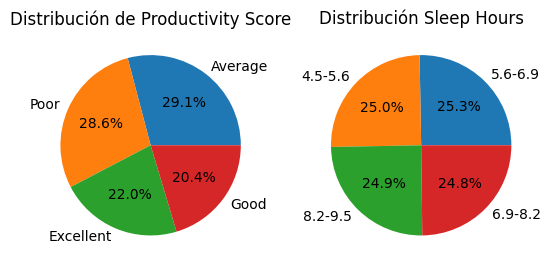

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.pie(df['Productivity Score clas'].value_counts(), labels=df['Productivity Score clas'].value_counts().index, autopct='%1.1f%%')
ax1.set_title('Distribución de Productivity Score')

ax2.pie(df['sleephours'].value_counts(), labels=df['sleephours'].value_counts().index, autopct='%1.1f%%')
ax2.set_title('Distribución Sleep Hours')

plt.show()

In [50]:
#Tabla de contingencia
display(pd.crosstab(df['sleephours'], df['Productivity Score clas']))


Productivity Score clas  Poor  Average  Good  Excellent
sleephours                                             
4.5-5.6                   354      393   235        269
5.6-6.9                   366      373   250        275
6.9-8.2                   342      355   265        278
8.2-9.5                   366      334   268        277

## 📌 Conclusiones Finales  

1️⃣ **La correlación no siempre indica las mejores características**  
   - Aunque las variables con mayor correlación con la variable objetivo pueden ser candidatas para el modelo, **no significa que sean las más relevantes**.  
   - La regularización en la regresión logística mostró que otras variables también pueden tener un impacto significativo, incluso si su correlación era menor.  

2️⃣ **La normalización no afecta el análisis realizado**  
   - La transformación de los datos con **StandardScaler** y **MinMaxScaler** no cambió la relación entre variables.  
   - La correlación entre las variables y la selección de características se mantuvieron consistentes antes y después de la normalización.  

3️⃣ **El uso de técnicas de regularización es clave para la selección de variables**  
   - Aplicar **ElasticNet con validación cruzada** nos permitió ver qué variables realmente aportan información útil al modelo.  
   - Algunas variables que parecían importantes por su correlación fueron descartadas por la regularización.  

4️⃣ **La validación cruzada ayuda a evitar el sobreajuste**  
   - Usar **cross-validation (CV)** nos aseguró que los resultados no dependieran solo de un conjunto de datos específico.  
   - Esto hizo que el modelo sea más **robusto y generalizable**.  

5️⃣ **El análisis exploratorio de datos es fundamental antes de modelar**  
   - Visualizaciones como **pairplot (Seaborn)** y **boxplots interactivos (Plotly)** nos ayudaron a entender la distribución y relaciones de las variables.  
   - Detectamos posibles **outliers** y patrones que podrían afectar la predicción.  

6️⃣ **El preprocesamiento influye en el desempeño del modelo**  
   - Técnicas como la normalización y la eliminación de valores nulos o inconsistentes **mejoran la estabilidad del modelo**.  
   - Un mal preprocesamiento puede afectar los coeficientes y la interpretación de la regresión logística.  

7️⃣ **No todas las variables tienen impacto en la predicción**  
   - Algunas variables fueron eliminadas por el modelo debido a su coeficiente **cercano a 0** tras la regularización.  
   - Esto confirma la importancia de **no depender solo de la intuición o la correlación**, sino de probar diferentes enfoques para seleccionar las mejores características.  

🔎 **Conclusión general:**  
El análisis de correlación es un buen punto de partida, pero es fundamental utilizar técnicas como la **regresión con regularización** para validar la importancia real de cada variable. La normalización ayuda a mejorar la estabilidad numérica del modelo, pero no modifica el análisis de importancia de características. **Usar validación cruzada y preprocesamiento adecuado mejora la capacidad del modelo para generalizar a nuevos datos.** 🚀  
